In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_classif

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from ipynb.fs.full.data_loading import load_data_from_csv

In [3]:
data = load_data_from_csv()

In [4]:
new_data = data.copy()

MLP accuracy: 0.83125
MLP config: MLPClassifier(activation='logistic', alpha=0.05,
              hidden_layer_sizes=(1000, 1000), learning_rate='adaptive',
              solver='sgd')


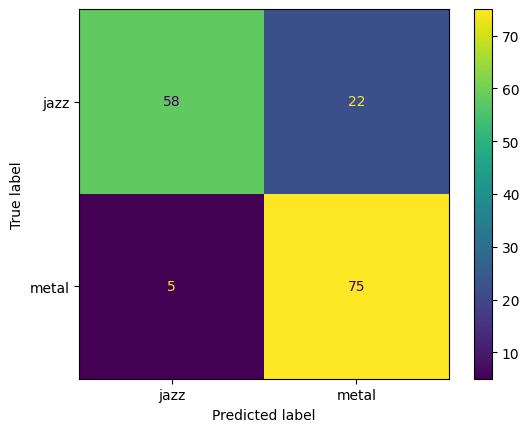

In [9]:
new_data_2genre = new_data[(new_data.label == "jazz") | (new_data.label == "metal")]

y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

param_grid_mlp = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
        'solver': ['lbgfs', 'sgd', 'adam'],
        'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (250, 500), (250, 500, 250), (1000, 1000)],
        'alpha': [0.0001, 0.05],
        'learning_rate': ['constant', 'invscaling', 'adaptive']}  
grid_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, refit = True, verbose = 0, cv=5)
grid_mlp.fit(X_train, y_train)
y_pred_mlp = grid_mlp.predict(X_test) 
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_best_estimator = str(grid_mlp.best_estimator_)
print("MLP accuracy:", mlp_accuracy)
print("MLP config:", mlp_best_estimator)

cm = confusion_matrix(y_test, y_pred_mlp, labels=grid_mlp.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_mlp.classes_)
disp.plot()
plt.show()

RF accuracy: 0.9875
RF config: RandomForestClassifier(random_state=0)


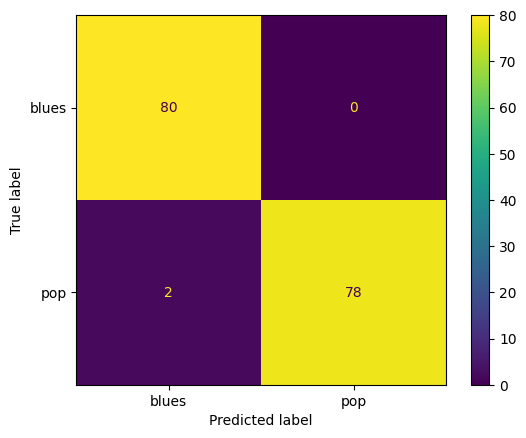

In [7]:
new_data_2genre = new_data[(new_data.label == "blues") | (new_data.label == "pop")]

y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

param_grid_rf = {'n_estimators': [100, 500, 1000], 'max_depth' : [None, 2, 4, 8],
                'random_state': [0], 'min_samples_leaf': [1, 2, 4, 8]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, refit = True, verbose = 0, cv = 5)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_best_estimator = str(grid_rf.best_estimator_)
print("RF accuracy:", rf_accuracy)
print("RF config:", rf_best_estimator)

cm = confusion_matrix(y_test, y_pred_rf, labels=grid_rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_rf.classes_)
disp.plot()
plt.show()

DT accuracy: 0.95
DT config: DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, random_state=0,
                       splitter='random')


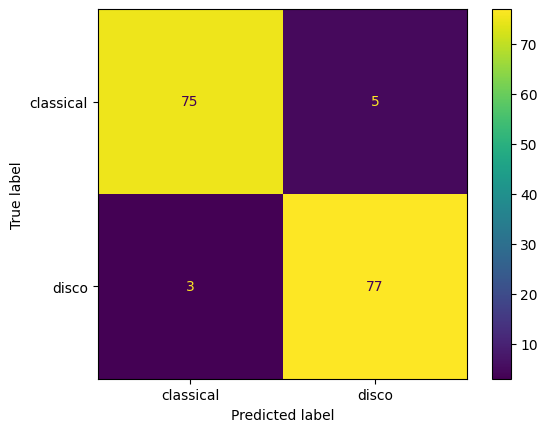

In [8]:
new_data_2genre = new_data[(new_data.label == "classical") | (new_data.label == "disco")]

y = new_data_2genre['label']
X = new_data_2genre.drop(labels=['label', 'filename', 'audio_data', 'audio_sr'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=0)

param_grid_dt = {'splitter': ['best', 'random'], 'max_depth': ['None', 2, 4, 8],
                 'random_state': [0], 'min_samples_leaf': [1, 2, 4, 8]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, refit = True, verbose = 0, cv = 5)
grid_dt.fit(X_train, y_train)
y_pred_dt = grid_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_best_estimator = str(grid_dt.best_estimator_)
print("DT accuracy:", dt_accuracy)
print("DT config:", dt_best_estimator)

cm = confusion_matrix(y_test, y_pred_dt, labels=grid_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_dt.classes_)
disp.plot()
plt.show()